<a href="https://colab.research.google.com/github/SylvainBallerini/test_technique_tictactrip/blob/main/Test_technique_Tictactrip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
pip install plotly

In [19]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [20]:
# Création des dataframes
data_cities = pd.read_csv("cities.csv")
data_providers = pd.read_csv('providers.csv')
data_stations = pd.read_csv("stations.csv")
data_ticket = pd.read_csv('ticket_data.csv')

In [21]:
data_cities.head()

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [22]:
data_cities.describe()

,id,latitude,longitude,population
count,8040.000000,8040.000000,8040.000000,3.690000e+02
mean,6328.786816,47.223456,6.299331,3.360184e+05
std,3504.698537,3.700934,7.747070,5.840409e+05
min,1.000000,1.370676,-101.397388,1.000460e+05
25%,2501.500000,44.662402,1.214282,1.253750e+05
50%,7003.500000,47.304750,4.887856,1.803020e+05
75%,9014.250000,49.611998,10.311597,3.098690e+05
max,12192.000000,64.145981,48.731938,8.416535e+06


In [51]:
data_providers.head(10)

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
5,14,6,NaN,driivme,DriiveMe,False,False,False,False,car
6,15,8,NaN,alsa,Alsa,False,False,False,False,bus
7,16,9,NaN,distribusion,Distribusion,False,False,False,False,bus
8,17,9,31,expressbusMunchen,Expressbus Munchen,False,False,False,False,bus
9,18,9,33,berlinLinienBus,Berlin Linien Bus,False,False,False,False,bus


In [24]:
data_stations.head()

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [25]:
data_ticket.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [26]:
data_ticket.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000


## 1 ) Extraire les infos intéressantes type prix min, moyen et max, durée min/max/moyenne par trajet


In [27]:
# Création d'un dataframe avec le prix, les trajets, et la durée
df_1 = data_ticket[['departure_ts', 'arrival_ts', 'price_in_cents', 'o_city', 'd_city']]
df_1.head()

,departure_ts,arrival_ts,price_in_cents,o_city,d_city
0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,611,542
1,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,611,542
2,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,611,542
3,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,611,542
4,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,611,542


In [28]:
# Changement des IDs des villes par les noms  
df_1 = pd.merge(df_1, data_cities[['id','unique_name']], left_on="o_city", right_on='id')
df_1 = df_1.drop(["o_city","id"], axis=1)
df_1 = df_1.rename(columns={"unique_name": "o_city"})
df_1 = pd.merge(df_1, data_cities[['id','unique_name']], left_on="d_city", right_on='id')
df_1 = df_1.drop(["d_city","id"], axis=1)
df_1 = df_1.rename(columns={"unique_name": "d_city"})
df_1.head()

,departure_ts,arrival_ts,price_in_cents,o_city,d_city
0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,orleans,montpellier
1,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,orleans,montpellier
2,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,orleans,montpellier
3,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,orleans,montpellier
4,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,orleans,montpellier


In [29]:
# Calul du temps de trajet en heur
# Convertion des colonnes departure_ts et arrival_ts en format date
df_1['departure_ts'] = pd.to_datetime(df_1['departure_ts'])
df_1['arrival_ts'] = pd.to_datetime(df_1['arrival_ts'])

# Création d'une fonction pour calculer le temps de trajet

def time(departure, arrival):
  t = arrival - departure
  return int(t.total_seconds()/3600)
  
df_1['time'] = df_1.apply(lambda x: time(x['departure_ts'], x['arrival_ts']), axis=1)

In [30]:
df_1.head()

,departure_ts,arrival_ts,price_in_cents,o_city,d_city,time
0,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,orleans,montpellier,6
1,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,orleans,montpellier,17
2,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,orleans,montpellier,31
3,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,orleans,montpellier,21
4,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,orleans,montpellier,21


In [31]:
df_1 = df_1.drop(['departure_ts','arrival_ts'], axis=1)


In [32]:
df_1.head()

,price_in_cents,o_city,d_city,time
0,4550,orleans,montpellier,6
1,1450,orleans,montpellier,17
2,7400,orleans,montpellier,31
3,13500,orleans,montpellier,21
4,7710,orleans,montpellier,21


In [33]:
# Création d'un pivot table avec en index la ville de départ et celle d'arrivé 
df_pt_1 = pd.pivot_table(df_1, index=['o_city','d_city'],values=['price_in_cents','time'],aggfunc=[np.mean, np.max, np.min, len])
df_pt_1

mean  ...  len
                                         price_in_cents  ... time
o_city                d_city                             ...     
aeroport-paris-vatry- troyes                5300.000000  ...    1
agde                  amsterdam            20320.000000  ...    5
agen                  dijon                11755.000000  ...    2
                      marseille             4042.666667  ...   30
                      marseille-aeroport    3833.333333  ...    6
...                                                 ...  ...  ...
villefranche-sur-cher bordeaux              5885.000000  ...   10
vitre                 nice                 18495.000000  ...    2
zurich                dijon                 1872.500000  ...    4
                      liege                 4096.666667  ...    9
                      strasbourg            1590.000000  ...    5

[1437 rows x 8 columns]

Maintenant que j'ai un dataframe qui répond à la question je vais utiliser 
Streamlit pour visualiser les différents résultats de manière interactive.


Problèmétique : Distribution des prix et des temps de trajets

In [34]:
# Distribution des prix (en euros) de l'ensemble des trajets

df_1["price_in_euros"] = df_1["price_in_cents"].apply(lambda x : int(x/100))
df_1.head()

,price_in_cents,o_city,d_city,time,price_in_euros
0,4550,orleans,montpellier,6,45
1,1450,orleans,montpellier,17,14
2,7400,orleans,montpellier,31,74
3,13500,orleans,montpellier,21,135
4,7710,orleans,montpellier,21,77


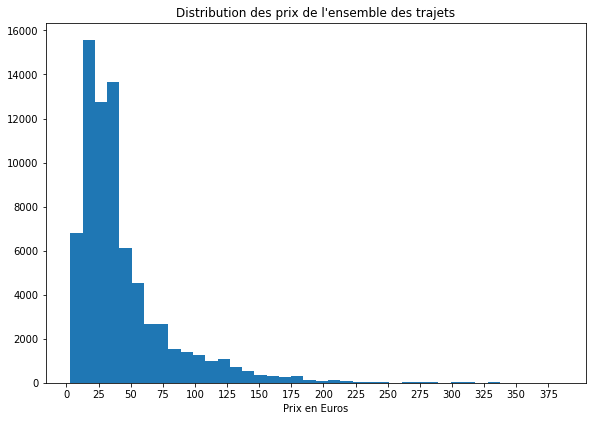

In [35]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_axes([0.25]*4)
ax.hist(df_1['price_in_euros'], 40)
ticks = [t for t in range(0,400,25)]
ax.set_xticks(ticks)
ax.set_title("Distribution des prix de l'ensemble des trajets")
ax.set_xlabel("Prix en Euros")
plt.show()

Problèmatique : Il y a t'il une corélation entre le temps de trajet et le prix ?

In [36]:
# Comparaion du prix et du temps de trajet
df_dv_1 = df_pt_1['mean'].sort_values(by=['price_in_cents'])
fig = px.line(df_dv_1, x="price_in_cents", y="time", title="Comparaison prix et temps de trajet")

fig.show()

Réponse : NON on voit clairement qu'on n'est loin d'une courbe linéaire MAIS il faut prendre en compte qu'ici on a l'ensemble des moyens des transports il faudrait pour cela appronfondir l'analyse

## Streamlit (hors test)

In [37]:
df_pt_1.loc['agen']

mean             ...            len     
                   price_in_cents       time  ... price_in_cents time
d_city                                        ...                    
dijon                11755.000000  13.500000  ...              2    2
marseille             4042.666667   7.966667  ...             30   30
marseille-aeroport    3833.333333   5.666667  ...              6    6
paris                 2797.500000  11.750000  ...              4    4
toulouse               864.626866   1.049751  ...            201  201

[5 rows x 8 columns]

In [38]:
df_pt_1.loc['agen'].index


Index(['dijon', 'marseille', 'marseille-aeroport', 'paris', 'toulouse'], dtype='object', name='d_city')

In [39]:
df_f = df_pt_1.loc['agen'].loc['marseille']
df_f

mean  price_in_cents    4042.666667
      time                 7.966667
amax  price_in_cents    8920.000000
      time                12.000000
amin  price_in_cents    2000.000000
      time                 5.000000
len   price_in_cents      30.000000
      time                30.000000
Name: marseille, dtype: float64

In [40]:
# Renommer le n
str(df_f.loc['len'].loc['time'])

'30.0'

In [41]:
# récupération de la liste des villes d'origines
li_o_city = np.unique(df_1['o_city'])


# `2) Différence de prix moyen et durée selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km)`

In [42]:
# Objectif d'un DF regroupant le prix, le moyen de transport, et la distance

Calcul des distances entre les villes. Je vais utiliser la formule Haversine.

In [43]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [59]:
df_2 = data_ticket[['departure_ts', 'arrival_ts', 'price_in_cents', 'o_city', 'd_city','company']]

In [60]:
#Création d'un DF regroupant nom des villes, les longitudes et latitudes des villes
# Ainsi que le prix et les temps de trajets

# Merge pour les villes d'origines (o_city)
df_2 = pd.merge(df_2, data_cities[['id','unique_name','latitude', 'longitude']], left_on="o_city", right_on='id')
df_2 = df_2.drop(["o_city","id"], axis=1)
df_2 = df_2.rename(columns={"unique_name": "o_city","latitude":"o_latitude","longitude":"o_longitude"})

#Merge pour les villes d'arrivés (d_city)
df_2 = pd.merge(df_2, data_cities[['id','unique_name','latitude', 'longitude']], left_on="d_city", right_on='id')
df_2 = df_2.drop(["d_city","id"], axis=1)
df_2 = df_2.rename(columns={"unique_name": "d_city","latitude":"d_latitude","longitude":"d_longitude"})

df_2.head()

,departure_ts,arrival_ts,price_in_cents,company,o_city,o_latitude,o_longitude,d_city,d_latitude,d_longitude
0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,8385,orleans,47.907018,1.90627,montpellier,43.604452,3.918318
1,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,9,orleans,47.907018,1.90627,montpellier,43.604452,3.918318
2,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,8377,orleans,47.907018,1.90627,montpellier,43.604452,3.918318
3,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,8377,orleans,47.907018,1.90627,montpellier,43.604452,3.918318
4,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,8381,orleans,47.907018,1.90627,montpellier,43.604452,3.918318
